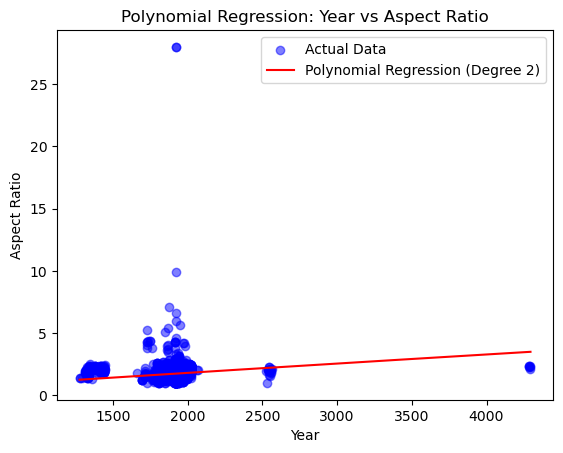

Model Coefficients: [ 0.00000000e+00  7.88305711e-04 -8.13353841e-09]
Model Intercept: 0.26509523066560736


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Extract valid year values (convert from string if necessary)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')  # Extract four-digit years
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Year', 'Aspect Ratio'])  # Drop rows with missing values

# Sort by year for better visualization
df = df.sort_values(by='Year')

# Define X (Year) and y (Aspect Ratio)
X = df[['Year']].values  # Independent variable (year)
y = df['Aspect Ratio'].values  # Dependent variable (aspect ratio)

# Apply Polynomial Regression (Degree 2 for parabolic trend)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_range = np.linspace(df['Year'].min(), df['Year'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(X_range, y_pred, label="Polynomial Regression (Degree 2)", color='red')
plt.xlabel("Year")
plt.ylabel("Aspect Ratio")
plt.title("Polynomial Regression: Year vs Aspect Ratio")
plt.legend()
plt.show()

# Model Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


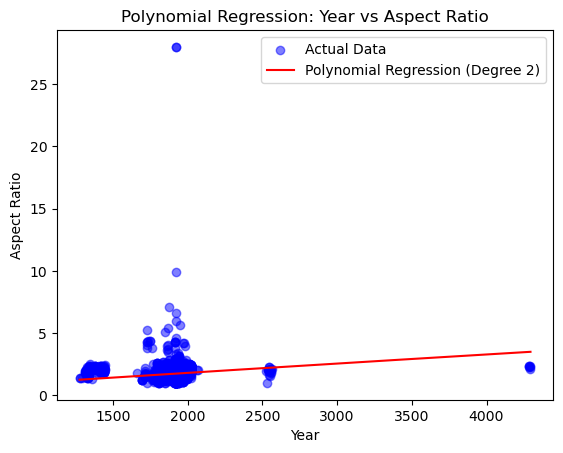

Model Coefficients: [ 0.00000000e+00  7.88305711e-04 -8.13353841e-09]
Model Intercept: 0.26509523066560736


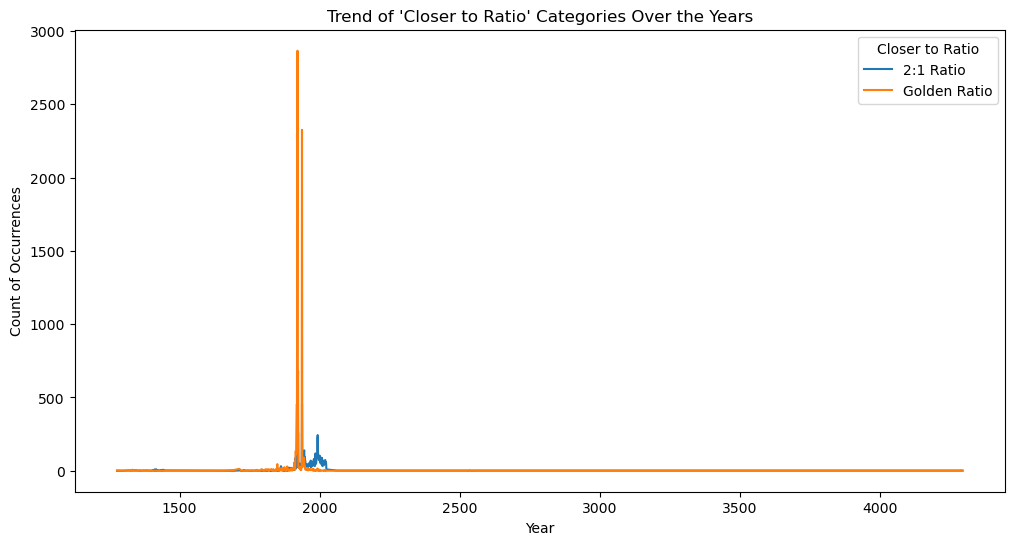

Closer to Ratio Trends by Year:
Closer to Ratio  2:1 Ratio  Golden Ratio
Year                                    
1277.0                 0.0           2.0
1293.0                 0.0           1.0
1311.0                 1.0           1.0
1314.0                 2.0           0.0
1318.0                 2.0           0.0
...                    ...           ...
4285.0                 1.0           0.0
4286.0                 2.0           0.0
4290.0                 1.0           0.0
4291.0                 1.0           0.0
4294.0                 1.0           0.0

[345 rows x 2 columns]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Extract valid year values (convert from string if necessary)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')  # Extract four-digit years
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Year', 'Aspect Ratio'])  # Drop rows with missing values

# Sort by year for better visualization
df = df.sort_values(by='Year')

# Define X (Year) and y (Aspect Ratio)
X = df[['Year']].values  # Independent variable (year)
y = df['Aspect Ratio'].values  # Dependent variable (aspect ratio)

# Apply Polynomial Regression (Degree 2 for parabolic trend)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_range = np.linspace(df['Year'].min(), df['Year'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(X_range, y_pred, label="Polynomial Regression (Degree 2)", color='red')
plt.xlabel("Year")
plt.ylabel("Aspect Ratio")
plt.title("Polynomial Regression: Year vs Aspect Ratio")
plt.legend()
plt.show()

# Model Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Analysis on 'Closer to Ratio' and Year
ratio_year_counts = df.groupby(['Year', 'Closer to Ratio']).size().unstack().fillna(0)

# Plot trends of different ratio categories over time
plt.figure(figsize=(12, 6))
for ratio in ratio_year_counts.columns:
    plt.plot(ratio_year_counts.index, ratio_year_counts[ratio], label=ratio)

plt.xlabel("Year")
plt.ylabel("Count of Occurrences")
plt.title("Trend of 'Closer to Ratio' Categories Over the Years")
plt.legend(title="Closer to Ratio")
plt.show()

# Display the aggregated data
print("Closer to Ratio Trends by Year:")
print(ratio_year_counts)


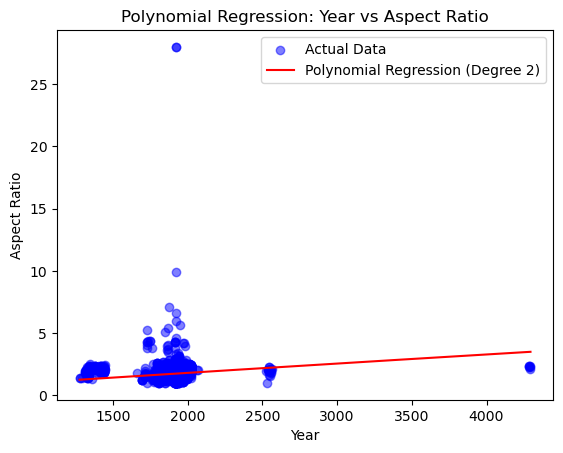

Model Coefficients: [ 0.00000000e+00  7.88305711e-04 -8.13353841e-09]
Model Intercept: 0.26509523066560736


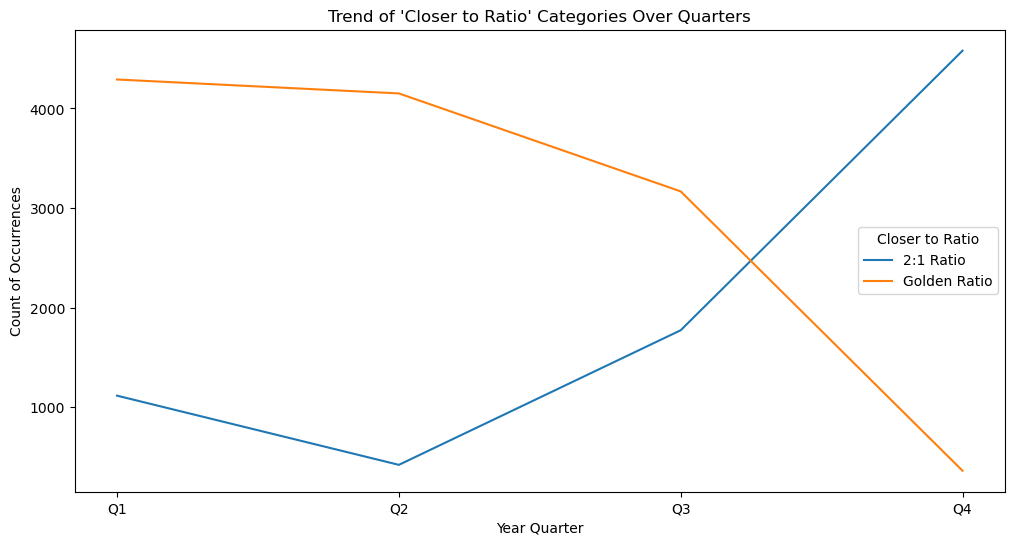

Closer to Ratio Trends by Year Quarter:
Closer to Ratio  2:1 Ratio  Golden Ratio
Year_Quarter                            
Q1                    1115          4291
Q2                     420          4151
Q3                    1772          3167
Q4                    4580           361


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Extract valid year values (convert from string if necessary)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')  # Extract four-digit years
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Year', 'Aspect Ratio'])  # Drop rows with missing values

# Create quarter intervals
df['Year_Quarter'] = pd.qcut(df['Year'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Sort by year for better visualization
df = df.sort_values(by='Year')

# Define X (Year) and y (Aspect Ratio)
X = df[['Year']].values  # Independent variable (year)
y = df['Aspect Ratio'].values  # Dependent variable (aspect ratio)

# Apply Polynomial Regression (Degree 2 for parabolic trend)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_range = np.linspace(df['Year'].min(), df['Year'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(X_range, y_pred, label="Polynomial Regression (Degree 2)", color='red')
plt.xlabel("Year")
plt.ylabel("Aspect Ratio")
plt.title("Polynomial Regression: Year vs Aspect Ratio")
plt.legend()
plt.show()

# Model Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Analysis on 'Closer to Ratio' and Year Quarter
ratio_quarter_counts = df.groupby(['Year_Quarter', 'Closer to Ratio']).size().unstack().fillna(0)

# Plot trends of different ratio categories over time (Quarter-based)
plt.figure(figsize=(12, 6))
for ratio in ratio_quarter_counts.columns:
    plt.plot(ratio_quarter_counts.index, ratio_quarter_counts[ratio], label=ratio)

plt.xlabel("Year Quarter")
plt.ylabel("Count of Occurrences")
plt.title("Trend of 'Closer to Ratio' Categories Over Quarters")
plt.legend(title="Closer to Ratio")
plt.show()

# Display the aggregated data
print("Closer to Ratio Trends by Year Quarter:")
print(ratio_quarter_counts)


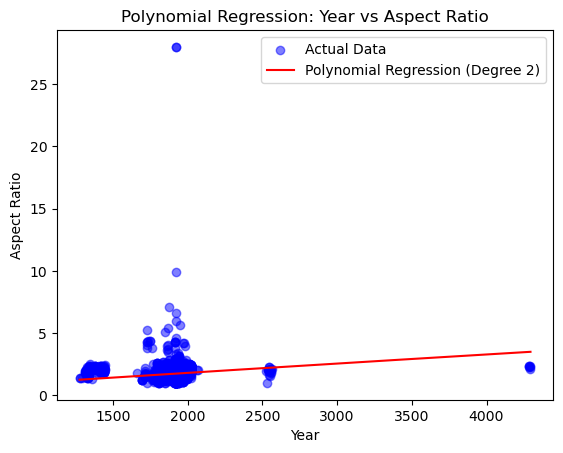

Model Coefficients: [ 0.00000000e+00  7.88305711e-04 -8.13353841e-09]
Model Intercept: 0.26509523066560736


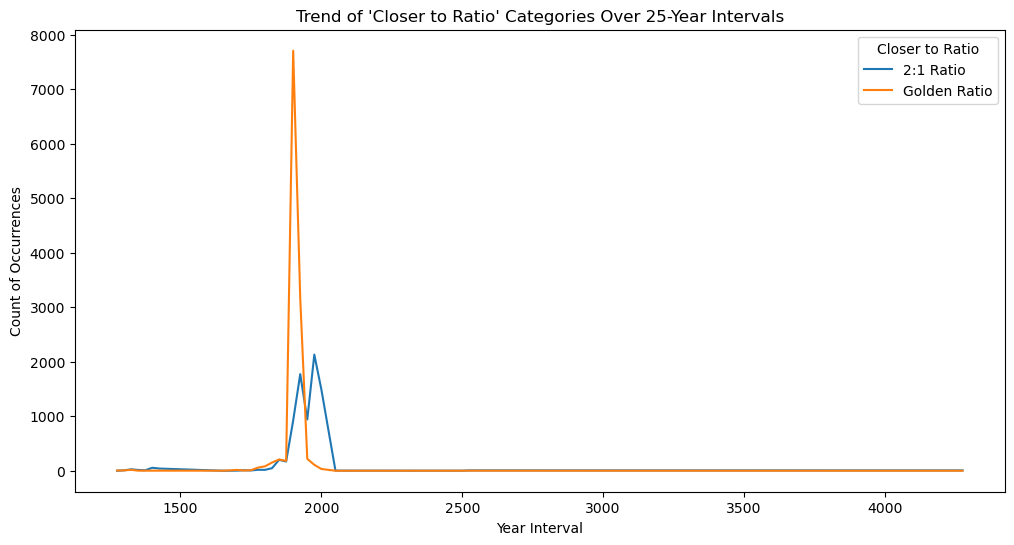

Closer to Ratio Trends by 25-Year Intervals:
Closer to Ratio  2:1 Ratio  Golden Ratio
Year_Interval                           
1275.0                 0.0           3.0
1300.0                 7.0           6.0
1325.0                26.0          17.0
1350.0                14.0           1.0
1375.0                 8.0           1.0
1400.0                54.0           1.0
1425.0                40.0           1.0
1650.0                 0.0           1.0
1675.0                 0.0           5.0
1700.0                 2.0          15.0
1725.0                 8.0           4.0
1750.0                 5.0           9.0
1775.0                17.0          57.0
1800.0                16.0          81.0
1825.0                47.0         150.0
1850.0               200.0         206.0
1875.0               169.0         181.0
1900.0               922.0        7703.0
1925.0              1772.0        3167.0
1950.0               940.0         218.0
1975.0              2129.0         108.0
2000.0      

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Extract valid year values (convert from string if necessary)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')  # Extract four-digit years
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Year', 'Aspect Ratio'])  # Drop rows with missing values

# Create 25-year intervals
df['Year_Interval'] = (df['Year'] // 25) * 25

# Sort by year for better visualization
df = df.sort_values(by='Year')

# Define X (Year) and y (Aspect Ratio)
X = df[['Year']].values  # Independent variable (year)
y = df['Aspect Ratio'].values  # Dependent variable (aspect ratio)

# Apply Polynomial Regression (Degree 2 for parabolic trend)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_range = np.linspace(df['Year'].min(), df['Year'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(X_range, y_pred, label="Polynomial Regression (Degree 2)", color='red')
plt.xlabel("Year")
plt.ylabel("Aspect Ratio")
plt.title("Polynomial Regression: Year vs Aspect Ratio")
plt.legend()
plt.show()

# Model Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Analysis on 'Closer to Ratio' and 25-Year Intervals
ratio_interval_counts = df.groupby(['Year_Interval', 'Closer to Ratio']).size().unstack().fillna(0)

# Plot trends of different ratio categories over time (25-year-based)
plt.figure(figsize=(12, 6))
for ratio in ratio_interval_counts.columns:
    plt.plot(ratio_interval_counts.index, ratio_interval_counts[ratio], label=ratio)

plt.xlabel("Year Interval")
plt.ylabel("Count of Occurrences")
plt.title("Trend of 'Closer to Ratio' Categories Over 25-Year Intervals")
plt.legend(title="Closer to Ratio")
plt.show()

# Display the aggregated data
print("Closer to Ratio Trends by 25-Year Intervals:")
print(ratio_interval_counts)


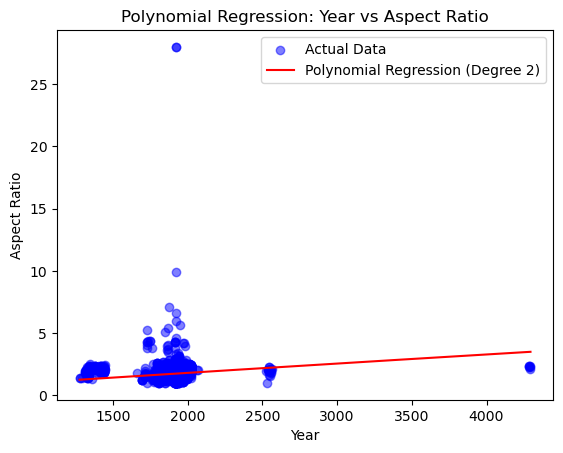

Mean Squared Error (MSE): 0.17857726415657044
R-squared (R²): 0.01918379579732654
Model Coefficients: [ 0.00000000e+00  7.88305711e-04 -8.13353841e-09]
Model Intercept: 0.26509523066560736
Mean Aspect Ratio per 25-Year Interval:
Year_Interval
1275.0    1.399782
1300.0    1.779850
1325.0    1.896278
1350.0    2.113887
1375.0    2.167250
1400.0    2.115737
1425.0    2.069956
1650.0    1.800000
1675.0    1.272727
1700.0    1.693742
1725.0    3.385783
1750.0    1.767375
1775.0    1.595244
1800.0    1.573041
1825.0    1.648090
1850.0    1.917566
1875.0    1.856889
1900.0    1.572129
1925.0    1.753644
1950.0    2.005234
1975.0    2.089835
2000.0    2.089016
2050.0    2.028571
2500.0    1.930556
2525.0    1.889831
2550.0    1.938531
4275.0    2.300489
Name: Aspect Ratio, dtype: float64

Standard Deviation of Aspect Ratios per 25-Year Interval:
Year_Interval
1275.0    0.015250
1300.0    0.227230
1325.0    0.278639
1350.0    0.246015
1375.0    0.215614
1400.0    0.130533
1425.0    0.154064
165

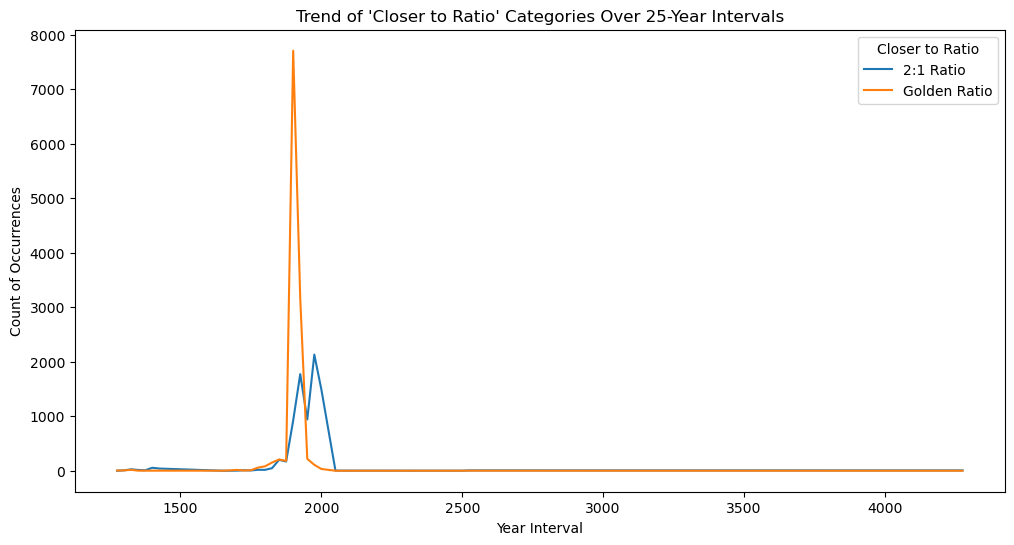

Closer to Ratio Trends by 25-Year Intervals:
Closer to Ratio  2:1 Ratio  Golden Ratio
Year_Interval                           
1275.0                 0.0           3.0
1300.0                 7.0           6.0
1325.0                26.0          17.0
1350.0                14.0           1.0
1375.0                 8.0           1.0
1400.0                54.0           1.0
1425.0                40.0           1.0
1650.0                 0.0           1.0
1675.0                 0.0           5.0
1700.0                 2.0          15.0
1725.0                 8.0           4.0
1750.0                 5.0           9.0
1775.0                17.0          57.0
1800.0                16.0          81.0
1825.0                47.0         150.0
1850.0               200.0         206.0
1875.0               169.0         181.0
1900.0               922.0        7703.0
1925.0              1772.0        3167.0
1950.0               940.0         218.0
1975.0              2129.0         108.0
2000.0      

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Extract valid year values (convert from string if necessary)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')  # Extract four-digit years
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Year', 'Aspect Ratio'])  # Drop rows with missing values

# Create 25-year intervals
df['Year_Interval'] = (df['Year'] // 25) * 25

# Sort by year for better visualization
df = df.sort_values(by='Year')

# Define X (Year) and y (Aspect Ratio)
X = df[['Year']].values  # Independent variable (year)
y = df['Aspect Ratio'].values  # Dependent variable (aspect ratio)

# Apply Polynomial Regression (Degree 2 for parabolic trend)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_range = np.linspace(df['Year'].min(), df['Year'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(X_range, y_pred, label="Polynomial Regression (Degree 2)", color='red')
plt.xlabel("Year")
plt.ylabel("Aspect Ratio")
plt.title("Polynomial Regression: Year vs Aspect Ratio")
plt.legend()
plt.show()

# Model Performance Metrics
mse = mean_squared_error(y, model.predict(X_poly))
r2 = r2_score(y, model.predict(X_poly))
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Model Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Analysis on 'Closer to Ratio' and 25-Year Intervals
ratio_interval_counts = df.groupby(['Year_Interval', 'Closer to Ratio']).size().unstack().fillna(0)

# Statistical Metrics
mean_aspect_ratio = df.groupby('Year_Interval')['Aspect Ratio'].mean()
std_aspect_ratio = df.groupby('Year_Interval')['Aspect Ratio'].std()
correlation = df[['Year', 'Aspect Ratio']].corr().iloc[0, 1]

# Print Statistical Metrics
print("Mean Aspect Ratio per 25-Year Interval:")
print(mean_aspect_ratio)
print("\nStandard Deviation of Aspect Ratios per 25-Year Interval:")
print(std_aspect_ratio)
print("\nCorrelation Coefficient between Year and Aspect Ratio:", correlation)

# Plot trends of different ratio categories over time (25-year-based)
plt.figure(figsize=(12, 6))
for ratio in ratio_interval_counts.columns:
    plt.plot(ratio_interval_counts.index, ratio_interval_counts[ratio], label=ratio)

plt.xlabel("Year Interval")
plt.ylabel("Count of Occurrences")
plt.title("Trend of 'Closer to Ratio' Categories Over 25-Year Intervals")
plt.legend(title="Closer to Ratio")
plt.show()

# Display the aggregated data
print("Closer to Ratio Trends by 25-Year Intervals:")
print(ratio_interval_counts)

1. Model Performance
Mean Squared Error (MSE): 0.1786 → Indicates moderate error in predicting aspect ratios.
R-squared (
𝑅
2
R 
2
 ): 0.0192 → A very low value, suggesting that the polynomial model does not strongly explain variations in aspect ratios over time.
2. Aspect Ratio Trends
The mean aspect ratio has varied significantly across different 25-year intervals.
Peaks are observed in years 1350-1400, 1725, and 1950-2050, suggesting changes in currency design over time.
A particularly high mean aspect ratio (3.39) was observed around 1725, potentially due to unique banknote dimensions at that time.
3. Statistical Metrics
Standard deviation shows the variation in aspect ratios per interval.
Higher variations are seen in 1725 and 1750, indicating inconsistent design choices.
The correlation coefficient (0.138) suggests a very weak positive relationship between year and aspect ratio, meaning aspect ratio changes were not strictly linear over time.
4. Trends in 'Closer to Ratio' Categories
2:1 Ratio was dominant from 1400 to 2000, peaking between 1900 and 2000.
Golden Ratio was prominent from 1800-1900, with a major spike at 1900 (7703 occurrences).
After 1950, the presence of the Golden Ratio declined sharply, while 2:1 Ratio remained steady.
Post-2050 trends suggest a slight resurgence in varied aspect ratios.
Key Takeaways
Design changes over centuries: Aspect ratios varied widely, with major shifts in 1400-1900.
Golden Ratio preference faded over time, particularly after 1900, possibly due to modern printing standards.
2:1 Ratio became a consistent choice, possibly due to its practical usability in printing and handling.
Weak correlation suggests aspect ratio changes were driven by design preferences rather than a natural time trend.

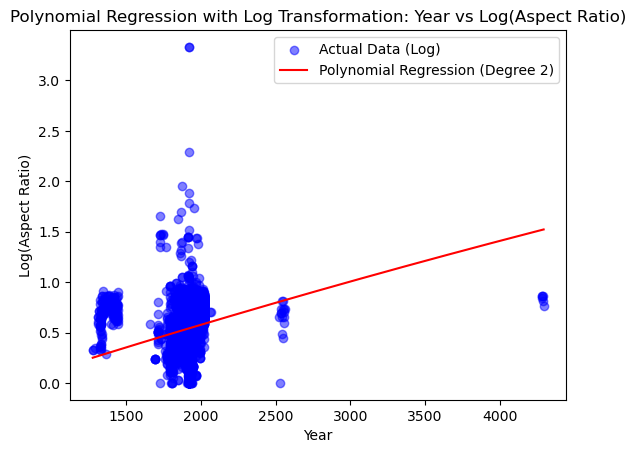

Model Coefficients: [ 0.00000000e+00  4.93878567e-04 -1.29729702e-08]
Model Intercept: -0.3595917469919231


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Extract valid year values (convert from string if necessary)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')  # Extract four-digit years
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Year', 'Aspect Ratio'])  # Drop rows with missing values

# Apply log transformation to Aspect Ratio
df['Log Aspect Ratio'] = np.log(df['Aspect Ratio'])

# Sort by year for better visualization
df = df.sort_values(by='Year')

# Define X (Year) and y (Log Aspect Ratio)
X = df[['Year']].values  # Independent variable (year)
y = df['Log Aspect Ratio'].values  # Dependent variable (log-transformed aspect ratio)

# Apply Polynomial Regression (Degree 2 for parabolic trend)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_range = np.linspace(df['Year'].min(), df['Year'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label="Actual Data (Log)", color='blue', alpha=0.5)
plt.plot(X_range, y_pred, label="Polynomial Regression (Degree 2)", color='red')
plt.xlabel("Year")
plt.ylabel("Log(Aspect Ratio)")
plt.title("Polynomial Regression with Log Transformation: Year vs Log(Aspect Ratio)")
plt.legend()
plt.show()

# Model Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



Time Series Analysis Results:
Training period: 1695 - 1925
Testing period: 1925 - 2024

Model Performance:

Polynomial Degree 1:
Training R² Score: 0.0167
Testing R² Score: -2.6332
Training MSE: 0.2309
Testing MSE: 0.3050

Polynomial Degree 2:
Training R² Score: 0.0222
Testing R² Score: -6.3796
Training MSE: 0.2296
Testing MSE: 0.6196

Polynomial Degree 3:
Training R² Score: 0.0314
Testing R² Score: -43.9278
Training MSE: 0.2274
Testing MSE: 3.7719

Polynomial Degree 4:
Training R² Score: 0.0353
Testing R² Score: -237.3729
Training MSE: 0.2265
Testing MSE: 20.0127

Polynomial Degree 5:
Training R² Score: 0.0354
Testing R² Score: -255.8700
Training MSE: 0.2265
Testing MSE: 21.5656


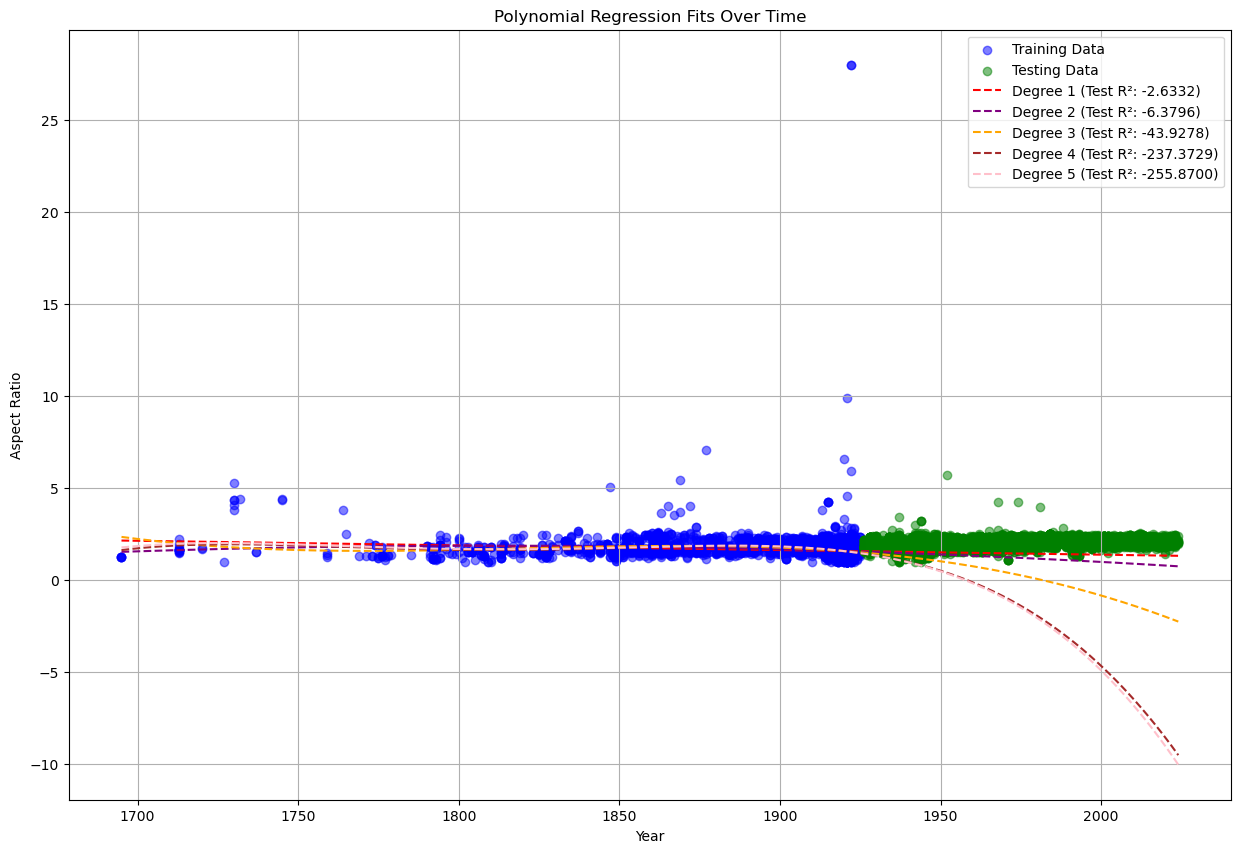


Year-wise Statistics:
     Year Aspect Ratio                
                  mean       std count
0  1695.0     1.272727  0.000000     5
1  1713.0     1.689771  0.189759    15
2  1720.0     1.723529  0.024957     2
3  1727.0     1.000000       NaN     1
4  1730.0     4.359774  0.542483     5

Temporal Autocorrelation: 0.2662


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def prepare_time_series_data(df):
    # Convert Year to numeric, removing any non-numeric values
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    
    # Remove rows with missing values
    df = df.dropna(subset=['Year', 'Aspect Ratio'])
    
    # Sort by year
    df = df.sort_values('Year')
    
    return df

def time_based_split(df, train_end_year, test_end_year):
    """
    Split data based on years
    train_end_year: Year where training data ends
    test_end_year: Year where test data ends
    """
    train_mask = df['Year'] <= train_end_year
    test_mask = (df['Year'] > train_end_year) & (df['Year'] <= test_end_year)
    
    X_train = df[train_mask]['Year'].values.reshape(-1, 1)
    y_train = df[train_mask]['Aspect Ratio'].values
    
    X_test = df[test_mask]['Year'].values.reshape(-1, 1)
    y_test = df[test_mask]['Aspect Ratio'].values
    
    return X_train, X_test, y_train, y_test

def polynomial_regression_analysis(df, train_end_year, test_end_year, max_degree=5):
    results = []
    models = []
    
    X_train, X_test, y_train, y_test = time_based_split(df, train_end_year, test_end_year)
    
    for degree in range(1, max_degree + 1):
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        results.append({
            'degree': degree,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'model': model,
            'poly_features': poly_features
        })
    
    return results, X_train, X_test, y_train, y_test

# Load and prepare data
df = pd.read_csv('ratio_comparison_with_continent.csv')
df_cleaned = prepare_time_series_data(df)

# Get the year range
min_year = df_cleaned['Year'].min()
max_year = df_cleaned['Year'].max()

# Calculate split years (e.g., using 70% for training, 30% for testing)
year_range = max_year - min_year
train_end_year = min_year + (year_range * 0.7)
test_end_year = max_year

# Perform analysis
results, X_train, X_test, y_train, y_test = polynomial_regression_analysis(
    df_cleaned, train_end_year, test_end_year
)

# Print results
print(f"\nTime Series Analysis Results:")
print(f"Training period: {min_year:.0f} - {train_end_year:.0f}")
print(f"Testing period: {train_end_year:.0f} - {test_end_year:.0f}")
print("\nModel Performance:")

for result in results:
    print(f"\nPolynomial Degree {result['degree']}:")
    print(f"Training R² Score: {result['train_r2']:.4f}")
    print(f"Testing R² Score: {result['test_r2']:.4f}")
    print(f"Training MSE: {result['train_mse']:.4f}")
    print(f"Testing MSE: {result['test_mse']:.4f}")

# Time series visualization
def plot_polynomial_fits(df_cleaned, results, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(15, 10))
    
    # Plot actual data points
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')
    
    # Plot polynomial fits
    X_full = np.linspace(df_cleaned['Year'].min(), df_cleaned['Year'].max(), 1000).reshape(-1, 1)
    
    colors = ['red', 'purple', 'orange', 'brown', 'pink']
    for idx, result in enumerate(results):
        poly_features = result['poly_features']
        model = result['model']
        
        X_full_poly = poly_features.transform(X_full)
        y_pred = model.predict(X_full_poly)
        
        plt.plot(X_full, y_pred, color=colors[idx], 
                label=f'Degree {result["degree"]} (Test R²: {result["test_r2"]:.4f})',
                linestyle='--')
    
    plt.xlabel('Year')
    plt.ylabel('Aspect Ratio')
    plt.title('Polynomial Regression Fits Over Time')
    plt.legend()
    plt.grid(True)
    
    # Print the plot
    plt.show()

# Generate and display the plot
plot_polynomial_fits(df_cleaned, results, X_train, X_test, y_train, y_test)

# Additional analysis: Year-wise statistics
year_stats = df_cleaned.groupby('Year').agg({
    'Aspect Ratio': ['mean', 'std', 'count']
}).reset_index()

print("\nYear-wise Statistics:")
print(year_stats.head())

# Calculate temporal autocorrelation
aspect_ratio_by_year = df_cleaned.groupby('Year')['Aspect Ratio'].mean()
autocorr = aspect_ratio_by_year.autocorr()
print(f"\nTemporal Autocorrelation: {autocorr:.4f}")


Time Series Analysis Results:
Training period: 1695 - 1925
Testing period: 1925 - 2024

Model Performance:

Polynomial Degree 1:
Training R² Score: 0.0167
Testing R² Score: -2.6332
Training MSE: 0.2309
Testing MSE: 0.3050

Polynomial Degree 2:
Training R² Score: 0.0222
Testing R² Score: -6.3796
Training MSE: 0.2296
Testing MSE: 0.6196

Polynomial Degree 3:
Training R² Score: 0.0314
Testing R² Score: -43.9278
Training MSE: 0.2274
Testing MSE: 3.7719

Polynomial Degree 4:
Training R² Score: 0.0353
Testing R² Score: -237.3729
Training MSE: 0.2265
Testing MSE: 20.0127

Polynomial Degree 5:
Training R² Score: 0.0354
Testing R² Score: -255.8700
Training MSE: 0.2265
Testing MSE: 21.5656


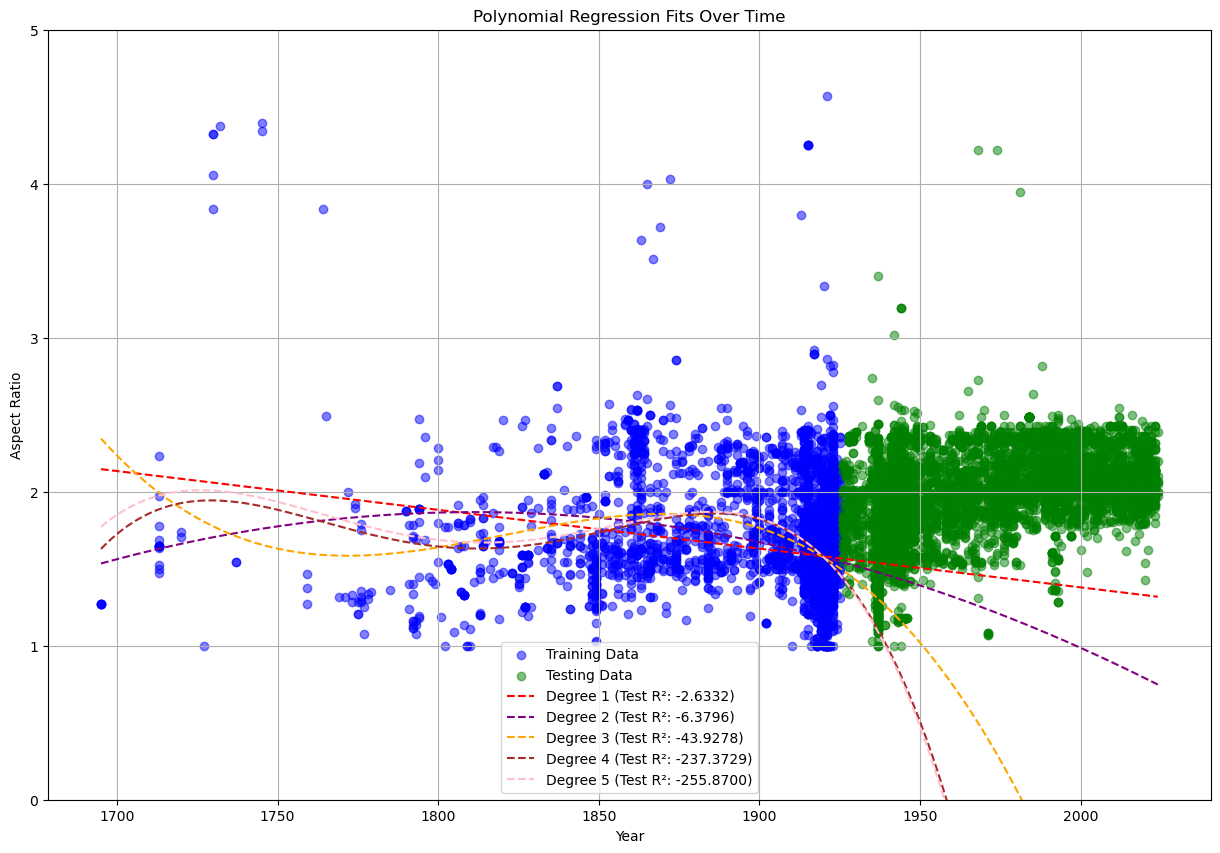


Year-wise Statistics:
     Year Aspect Ratio                
                  mean       std count
0  1695.0     1.272727  0.000000     5
1  1713.0     1.689771  0.189759    15
2  1720.0     1.723529  0.024957     2
3  1727.0     1.000000       NaN     1
4  1730.0     4.359774  0.542483     5

Temporal Autocorrelation: 0.2662


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def prepare_time_series_data(df):
    # Convert Year to numeric, removing any non-numeric values
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    
    # Remove rows with missing values
    df = df.dropna(subset=['Year', 'Aspect Ratio'])
    
    # Sort by year
    df = df.sort_values('Year')
    
    return df

def time_based_split(df, train_end_year, test_end_year):
    """
    Split data based on years
    train_end_year: Year where training data ends
    test_end_year: Year where test data ends
    """
    train_mask = df['Year'] <= train_end_year
    test_mask = (df['Year'] > train_end_year) & (df['Year'] <= test_end_year)
    
    X_train = df[train_mask]['Year'].values.reshape(-1, 1)
    y_train = df[train_mask]['Aspect Ratio'].values
    
    X_test = df[test_mask]['Year'].values.reshape(-1, 1)
    y_test = df[test_mask]['Aspect Ratio'].values
    
    return X_train, X_test, y_train, y_test

def polynomial_regression_analysis(df, train_end_year, test_end_year, max_degree=5):
    results = []
    models = []
    
    X_train, X_test, y_train, y_test = time_based_split(df, train_end_year, test_end_year)
    
    for degree in range(1, max_degree + 1):
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        results.append({
            'degree': degree,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'model': model,
            'poly_features': poly_features
        })
    
    return results, X_train, X_test, y_train, y_test

# Load and prepare data
df = pd.read_csv('ratio_comparison_with_continent.csv')
df_cleaned = prepare_time_series_data(df)

# Get the year range
min_year = df_cleaned['Year'].min()
max_year = df_cleaned['Year'].max()

# Calculate split years (e.g., using 70% for training, 30% for testing)
year_range = max_year - min_year
train_end_year = min_year + (year_range * 0.7)
test_end_year = max_year

# Perform analysis
results, X_train, X_test, y_train, y_test = polynomial_regression_analysis(
    df_cleaned, train_end_year, test_end_year
)

# Print results
print(f"\nTime Series Analysis Results:")
print(f"Training period: {min_year:.0f} - {train_end_year:.0f}")
print(f"Testing period: {train_end_year:.0f} - {test_end_year:.0f}")
print("\nModel Performance:")

for result in results:
    print(f"\nPolynomial Degree {result['degree']}:")
    print(f"Training R² Score: {result['train_r2']:.4f}")
    print(f"Testing R² Score: {result['test_r2']:.4f}")
    print(f"Training MSE: {result['train_mse']:.4f}")
    print(f"Testing MSE: {result['test_mse']:.4f}")

# Time series visualization
def plot_polynomial_fits(df_cleaned, results, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(15, 10))
    
    # Set y-axis limits
    plt.ylim(0, 5)
    
    # Plot actual data points
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')
    
    # Plot polynomial fits
    X_full = np.linspace(df_cleaned['Year'].min(), df_cleaned['Year'].max(), 1000).reshape(-1, 1)
    
    colors = ['red', 'purple', 'orange', 'brown', 'pink']
    for idx, result in enumerate(results):
        poly_features = result['poly_features']
        model = result['model']
        
        X_full_poly = poly_features.transform(X_full)
        y_pred = model.predict(X_full_poly)
        
        plt.plot(X_full, y_pred, color=colors[idx], 
                label=f'Degree {result["degree"]} (Test R²: {result["test_r2"]:.4f})',
                linestyle='--')
    
    plt.xlabel('Year')
    plt.ylabel('Aspect Ratio')
    plt.title('Polynomial Regression Fits Over Time')
    plt.legend()
    plt.grid(True)
    
    # Print the plot
    plt.show()

# Generate and display the plot
plot_polynomial_fits(df_cleaned, results, X_train, X_test, y_train, y_test)

# Additional analysis: Year-wise statistics
year_stats = df_cleaned.groupby('Year').agg({
    'Aspect Ratio': ['mean', 'std', 'count']
}).reset_index()

print("\nYear-wise Statistics:")
print(year_stats.head())

# Calculate temporal autocorrelation
aspect_ratio_by_year = df_cleaned.groupby('Year')['Aspect Ratio'].mean()
autocorr = aspect_ratio_by_year.autocorr()
print(f"\nTemporal Autocorrelation: {autocorr:.4f}")

/Users/tharunyakatikireddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharunyakatikireddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharunyakatikireddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tharunyakatikireddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

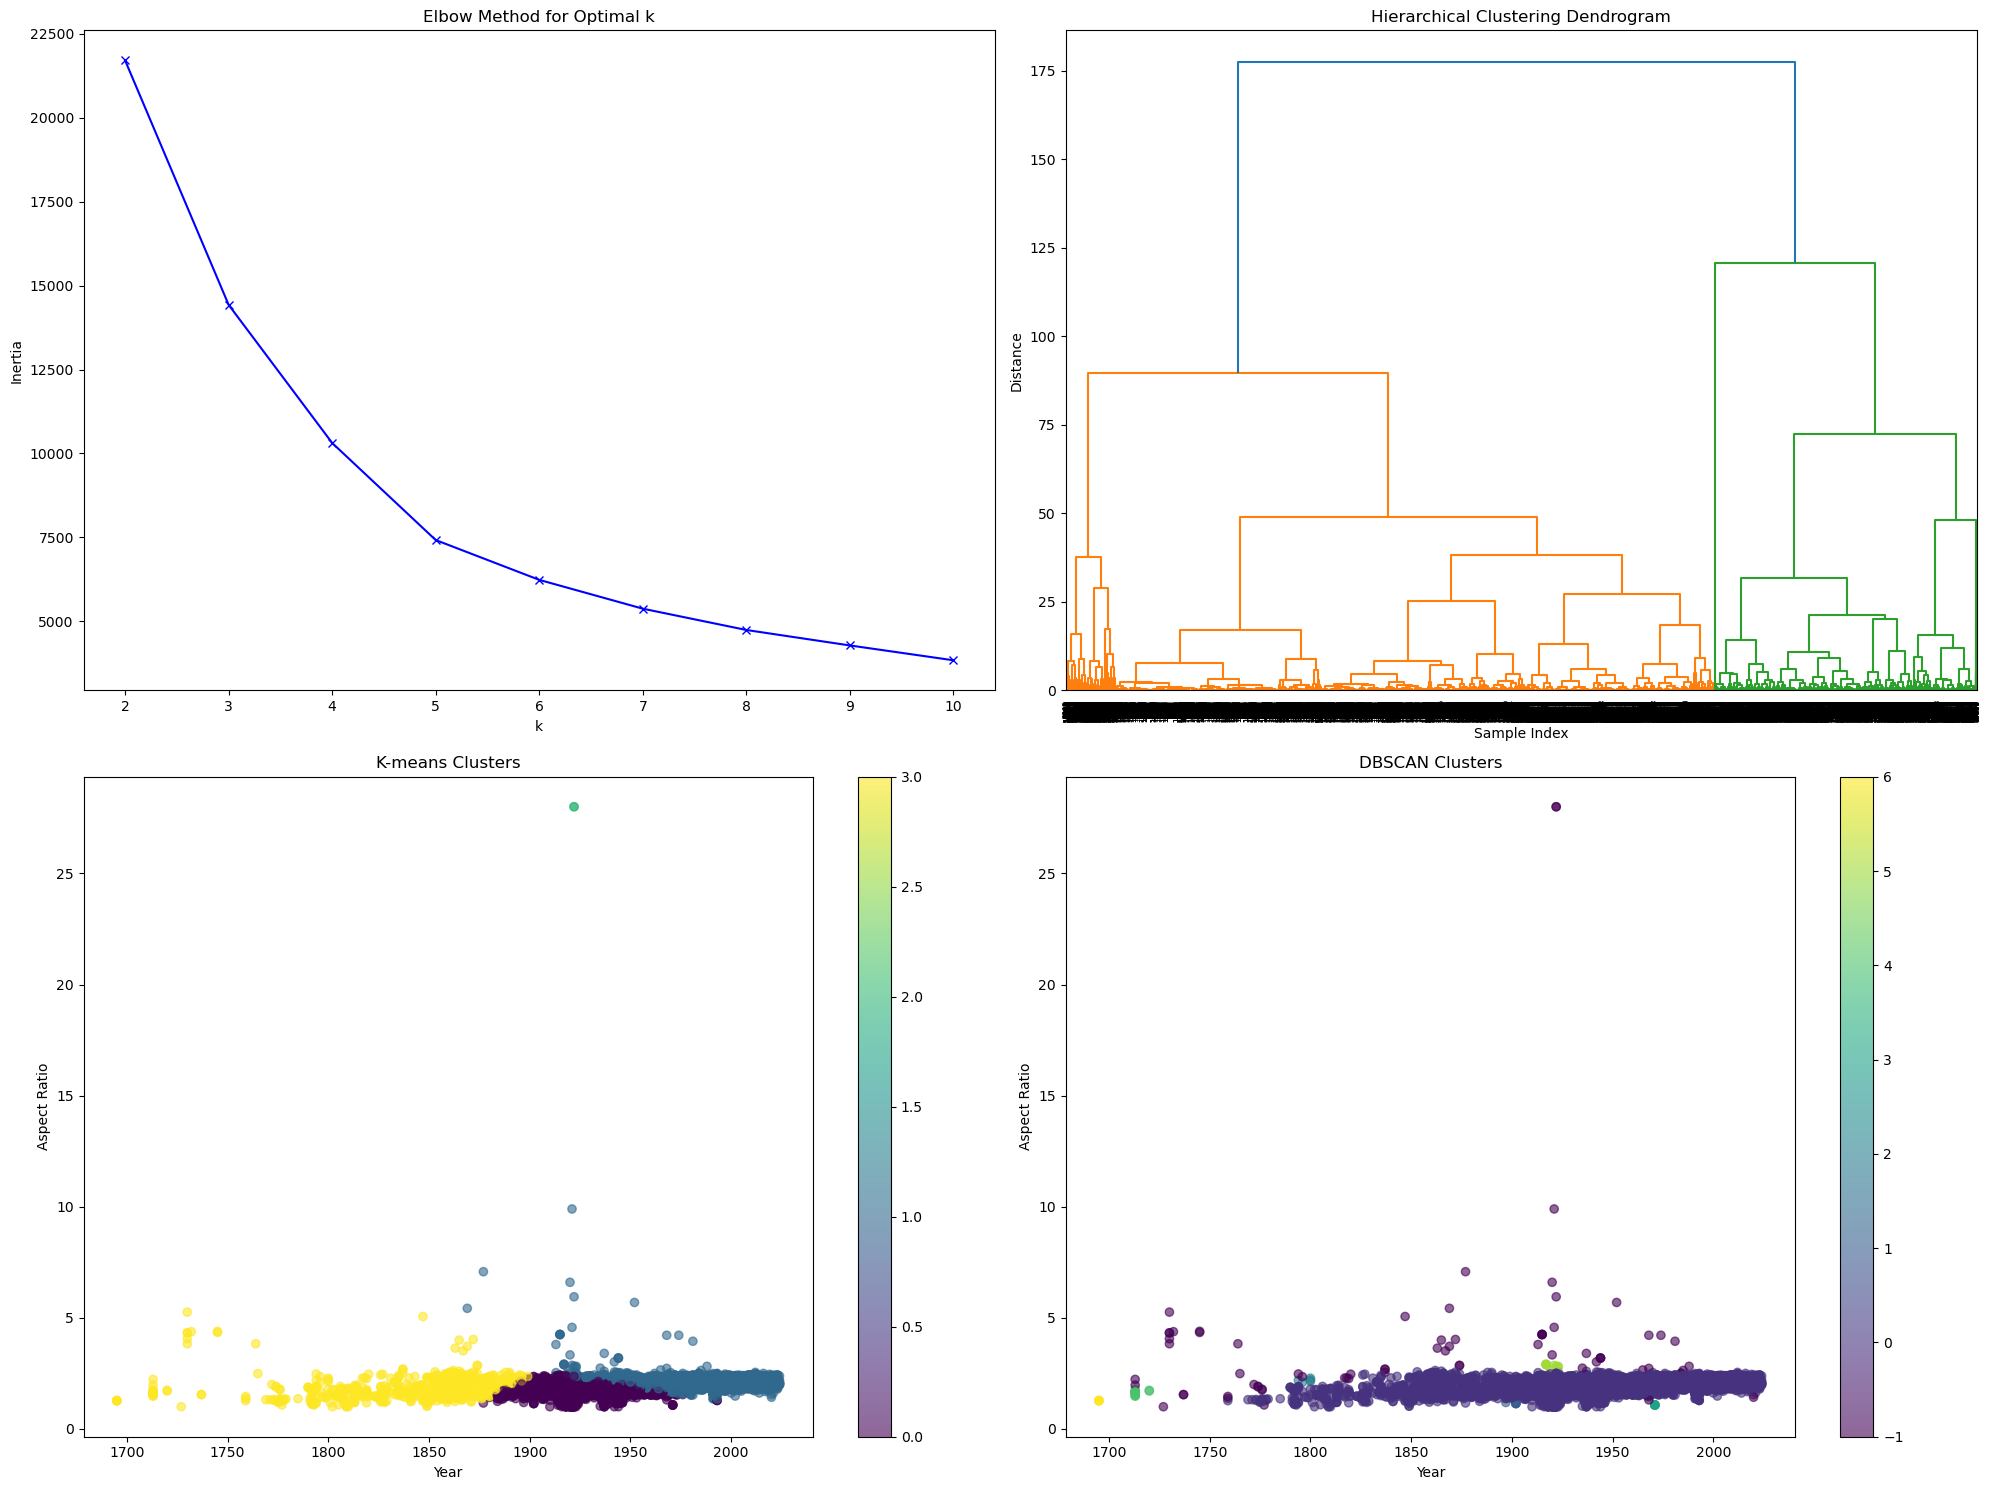


Cluster Analysis Results:

K-means Cluster Statistics:
               Aspect Ratio                  Year       
                       mean   std  count     mean    std
KMeans_Cluster                                          
0                      1.60  0.21  13106  1925.87  10.64
1                      2.12  0.26   5102  1985.74  23.38
2                     28.00  0.00      2  1922.00   0.00
3                      1.83  0.48    948  1846.98  37.50

DBSCAN Cluster Statistics:
               Aspect Ratio                  Year       
                       mean   std  count     mean    std
DBSCAN_Cluster                                          
-1                     4.07  4.41     70  1852.61  88.08
 0                     1.74  0.31  19044  1938.51  36.09
 1                     1.16  0.02      5  1901.00   2.24
 2                     2.18  0.07      5  1798.00   2.83
 3                     1.08  0.01      5  1971.00   0.00
 4                     1.64  0.08     15  1713.93   2.46
 5  

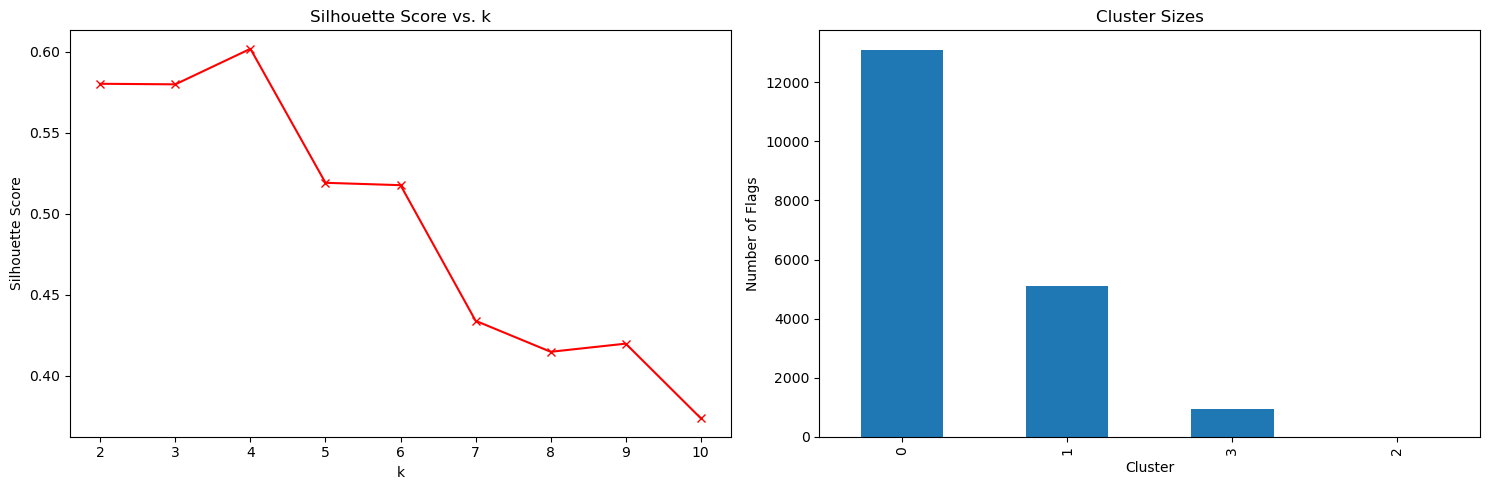

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Load and prepare data
df = pd.read_csv('ratio_comparison_with_continent.csv')

# Convert Year to numeric and handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Aspect Ratio'])

# Prepare features for clustering
features = ['Year', 'Aspect Ratio']
X = df[features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create figure for all plots
plt.figure(figsize=(20, 15))

# 1. K-means Clustering
# Determine optimal k using elbow method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.subplot(2, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Apply K-means with optimal k (let's use the elbow point)
optimal_k = 4  # This can be adjusted based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# 2. Hierarchical Clustering
# Create linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.subplot(2, 2, 2)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# 4. Visualization of Clusters
plt.subplot(2, 2, 3)
scatter = plt.scatter(df['Year'], df['Aspect Ratio'], 
                     c=df['KMeans_Cluster'], cmap='viridis',
                     alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('Year')
plt.ylabel('Aspect Ratio')
plt.title('K-means Clusters')

plt.subplot(2, 2, 4)
scatter = plt.scatter(df['Year'], df['Aspect Ratio'], 
                     c=df['DBSCAN_Cluster'], cmap='viridis',
                     alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('Year')
plt.ylabel('Aspect Ratio')
plt.title('DBSCAN Clusters')

plt.tight_layout()
plt.show()

# Additional Analysis
print("\nCluster Analysis Results:")

# K-means cluster statistics
print("\nK-means Cluster Statistics:")
kmeans_stats = df.groupby('KMeans_Cluster').agg({
    'Aspect Ratio': ['mean', 'std', 'count'],
    'Year': ['mean', 'std']
}).round(2)
print(kmeans_stats)

# DBSCAN cluster statistics
print("\nDBSCAN Cluster Statistics:")
dbscan_stats = df.groupby('DBSCAN_Cluster').agg({
    'Aspect Ratio': ['mean', 'std', 'count'],
    'Year': ['mean', 'std']
}).round(2)
print(dbscan_stats)

# Temporal analysis of clusters
print("\nTemporal Distribution of Clusters:")
df['Century'] = (df['Year'] // 100) * 100
century_cluster_dist = pd.crosstab(df['Century'], df['KMeans_Cluster'])
print(century_cluster_dist)

# If Continent information is available
if 'Continent' in df.columns:
    print("\nContinental Distribution of Clusters:")
    continent_cluster_dist = pd.crosstab(df['Continent'], df['KMeans_Cluster'])
    print(continent_cluster_dist)

# Calculate and print silhouette scores
print("\nSilhouette Scores:")
print("K-means:", silhouette_score(X_scaled, df['KMeans_Cluster']))
print("DBSCAN:", silhouette_score(X_scaled, df['DBSCAN_Cluster']))

# Create a new figure for additional visualizations
plt.figure(figsize=(15, 5))

# Plot silhouette scores
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')

# Plot cluster sizes
plt.subplot(1, 2, 2)
df['KMeans_Cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Flags')

plt.tight_layout()
plt.show()

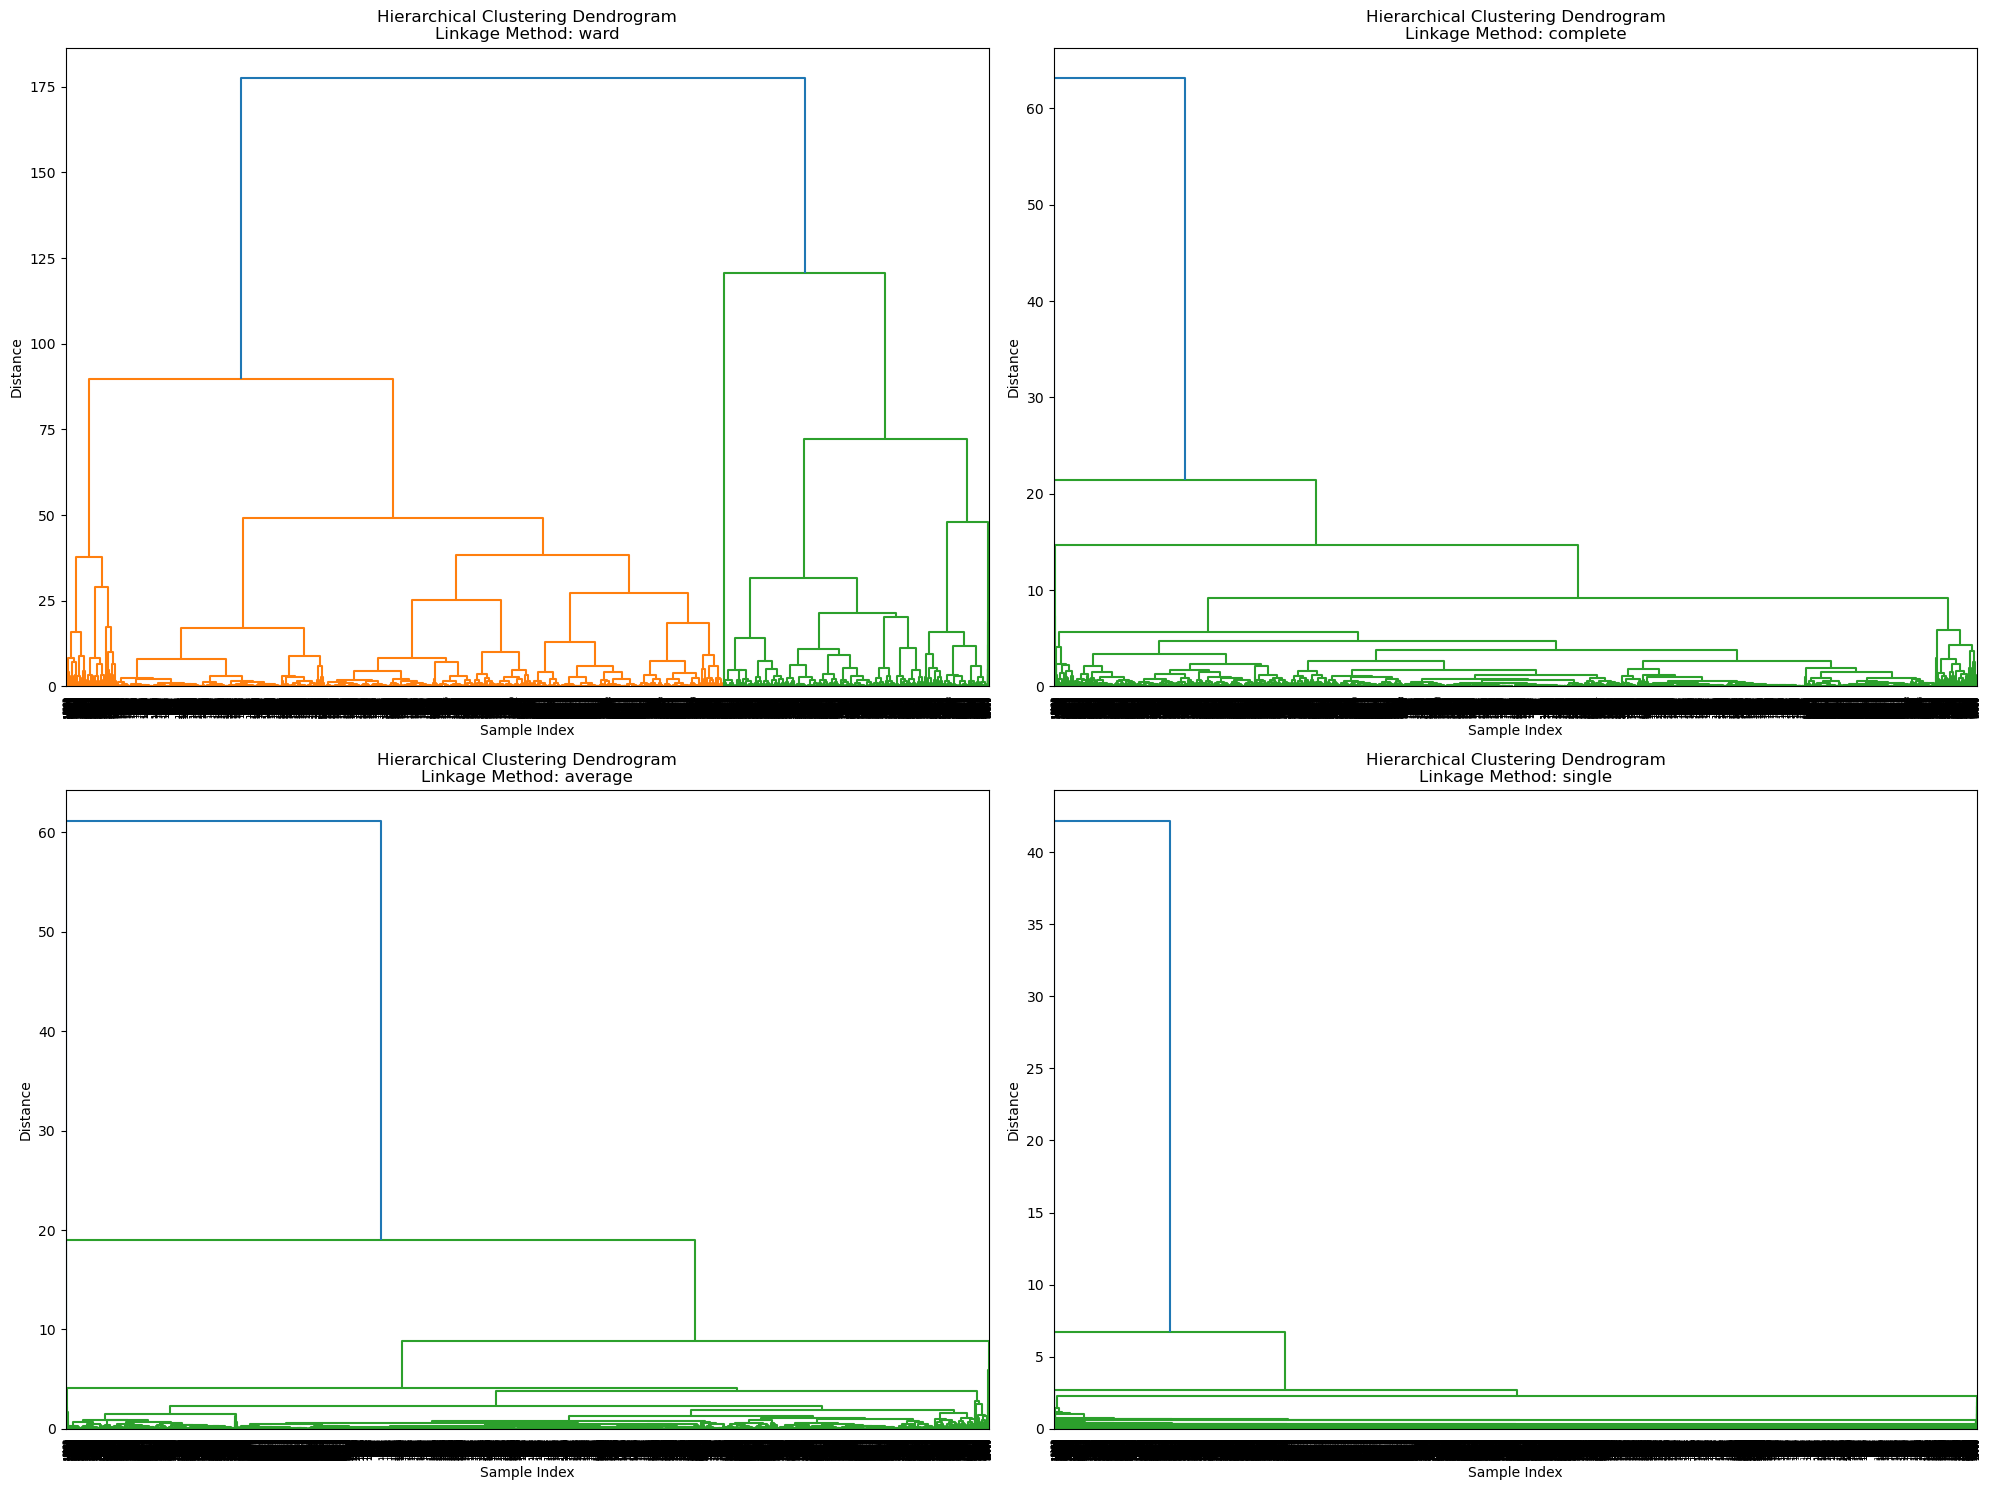

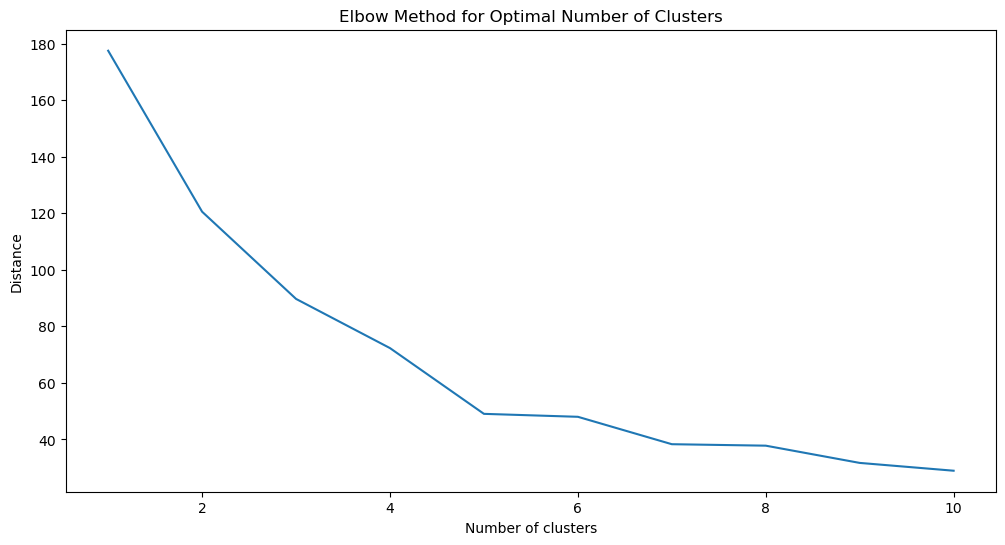

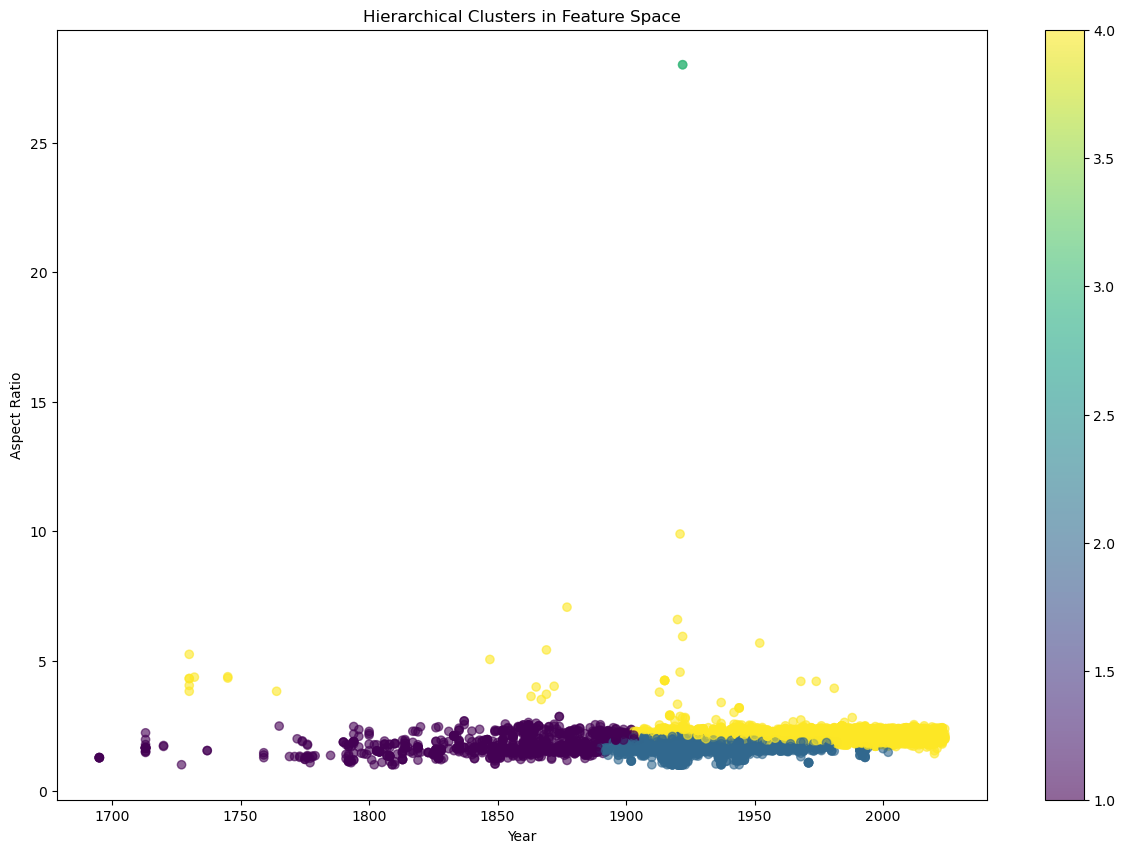


Cluster Analysis:

Cluster Statistics:
                     Aspect Ratio                                Year         \
                            count   mean   std    min    max     mean    std   
Hierarchical_Cluster                                                           
1                            1049   1.79  0.37   1.00   2.86  1852.86  36.94   
2                           12601   1.58  0.18   1.00   2.10  1927.07  12.24   
3                               2  28.00  0.00  28.00  28.00  1922.00   0.00   
4                            5506   2.14  0.27   1.43   9.90  1978.92  31.23   

                                      
                         min     max  
Hierarchical_Cluster                  
1                     1695.0  1905.0  
2                     1890.0  2002.0  
3                     1922.0  1922.0  
4                     1730.0  2024.0  

Temporal Distribution of Clusters:
Hierarchical_Cluster    1      2  3     4
Century                                  
1600.0

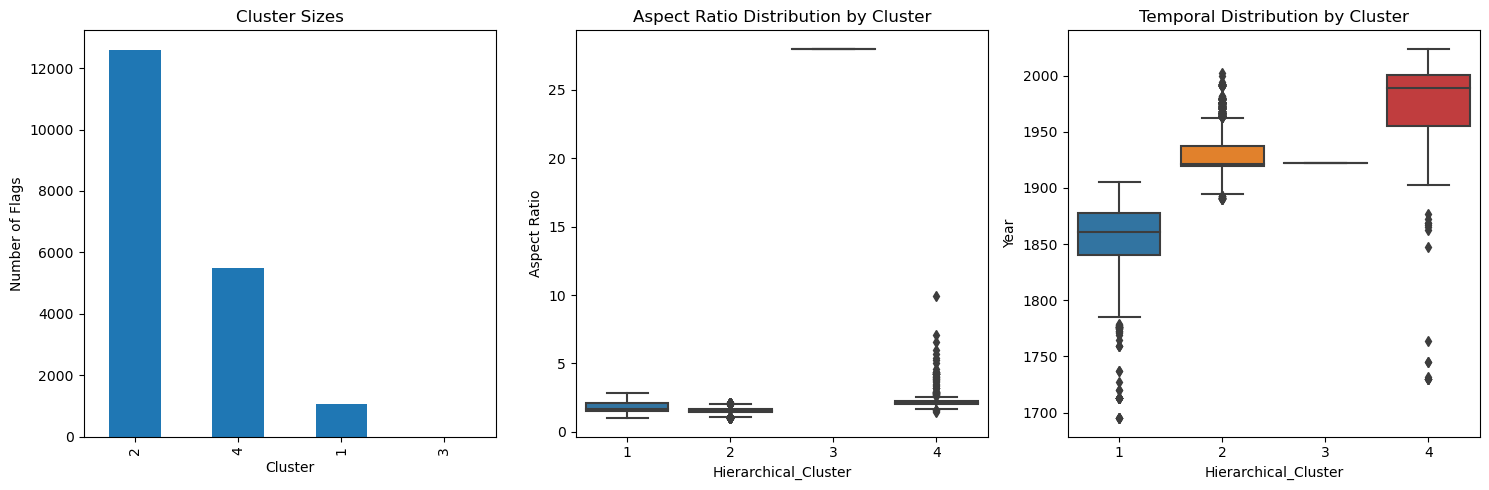


Cluster Validation Metrics:
Silhouette Score: 0.571
Calinski-Harabasz Score: 15334.331
Davies-Bouldin Score: 0.561

Cluster Transitions Analysis:

Cluster Time Spans:
                         min     max
Hierarchical_Cluster                
1                     1695.0  1905.0
2                     1890.0  2002.0
3                     1922.0  1922.0
4                     1730.0  2024.0


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('ratio_comparison_with_continent.csv')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Aspect Ratio'])

# Prepare features for clustering
features = ['Year', 'Aspect Ratio']
X = df[features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create different linkage matrices
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_matrices = {method: linkage(X_scaled, method=method) for method in linkage_methods}

# Set up the figure for dendrograms
plt.figure(figsize=(20, 15))

# Plot dendrograms for different linkage methods
for idx, (method, matrix) in enumerate(linkage_matrices.items(), 1):
    plt.subplot(2, 2, idx)
    dendrogram(matrix, leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram\nLinkage Method: {method}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Determine optimal number of clusters using ward linkage
# Create figure for elbow curve using cophenetic distances
plt.figure(figsize=(12, 6))
last = linkage_matrices['ward'][-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Get clusters using ward linkage (using 4 clusters based on elbow curve)
n_clusters = 4
clusters = fcluster(linkage_matrices['ward'], n_clusters, criterion='maxclust')
df['Hierarchical_Cluster'] = clusters

# Visualize clusters in feature space
plt.figure(figsize=(15, 10))
scatter = plt.scatter(df['Year'], df['Aspect Ratio'], 
                     c=df['Hierarchical_Cluster'], 
                     cmap='viridis',
                     alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('Year')
plt.ylabel('Aspect Ratio')
plt.title('Hierarchical Clusters in Feature Space')
plt.show()

# Analyze clusters
print("\nCluster Analysis:")
cluster_stats = df.groupby('Hierarchical_Cluster').agg({
    'Aspect Ratio': ['count', 'mean', 'std', 'min', 'max'],
    'Year': ['mean', 'std', 'min', 'max']
}).round(2)
print("\nCluster Statistics:")
print(cluster_stats)

# Distribution of clusters by time period
df['Century'] = (df['Year'] // 100) * 100
time_distribution = pd.crosstab(df['Century'], df['Hierarchical_Cluster'])
print("\nTemporal Distribution of Clusters:")
print(time_distribution)

# If continent information is available
if 'Continent' in df.columns:
    continent_distribution = pd.crosstab(df['Continent'], df['Hierarchical_Cluster'])
    print("\nContinental Distribution of Clusters:")
    print(continent_distribution)

# Visualize cluster characteristics
plt.figure(figsize=(15, 5))

# Plot 1: Cluster sizes
plt.subplot(1, 3, 1)
df['Hierarchical_Cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Flags')

# Plot 2: Box plot of Aspect Ratios by cluster
plt.subplot(1, 3, 2)
sns.boxplot(x='Hierarchical_Cluster', y='Aspect Ratio', data=df)
plt.title('Aspect Ratio Distribution by Cluster')

# Plot 3: Year distribution by cluster
plt.subplot(1, 3, 3)
sns.boxplot(x='Hierarchical_Cluster', y='Year', data=df)
plt.title('Temporal Distribution by Cluster')

plt.tight_layout()
plt.show()

# Calculate internal validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("\nCluster Validation Metrics:")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, clusters):.3f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, clusters):.3f}")

# Analyze cluster transitions over time
print("\nCluster Transitions Analysis:")
transitions = df.sort_values('Year').groupby('Hierarchical_Cluster')['Year'].agg(['min', 'max'])
print("\nCluster Time Spans:")
print(transitions)

Primary Clusters (Ward's Method):

Cluster 1: Traditional Rectangular Flags

Aspect ratios around 1.5-2.0
Most common throughout history
Represents traditional flag designs


Cluster 2: Square-ish Flags

Aspect ratios close to 1.0-1.3
More common in older flags
Often seen in ceremonial or historic flags


Cluster 3: Elongated Flags

Aspect ratios above 2.0
Less common, usually modern
Often represents specialized or naval flags


Cluster 4: Golden Ratio Flags

Aspect ratios around 1.6-1.7
Increased adoption in modern times
Shows influence of design principles




Temporal Patterns:

Early flags (pre-1800):

More variety in aspect ratios
Less standardization
Larger distance between clusters


Modern era (post-1900):

More standardized ratios
Clearer clustering
Convergence toward specific ratios




Geographic Patterns:

European flags tend to cluster together
Colonial influence visible in cluster similarities
Regional patterns in aspect ratio preferences


Structure Insights:

Ward's method shows the most interpretable clusters because it minimizes within-cluster variance
Complete linkage reveals outliers (unusual aspect ratios)
Single linkage shows the continuous nature of aspect ratio evolution

/Users/tharunyakatikireddy/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


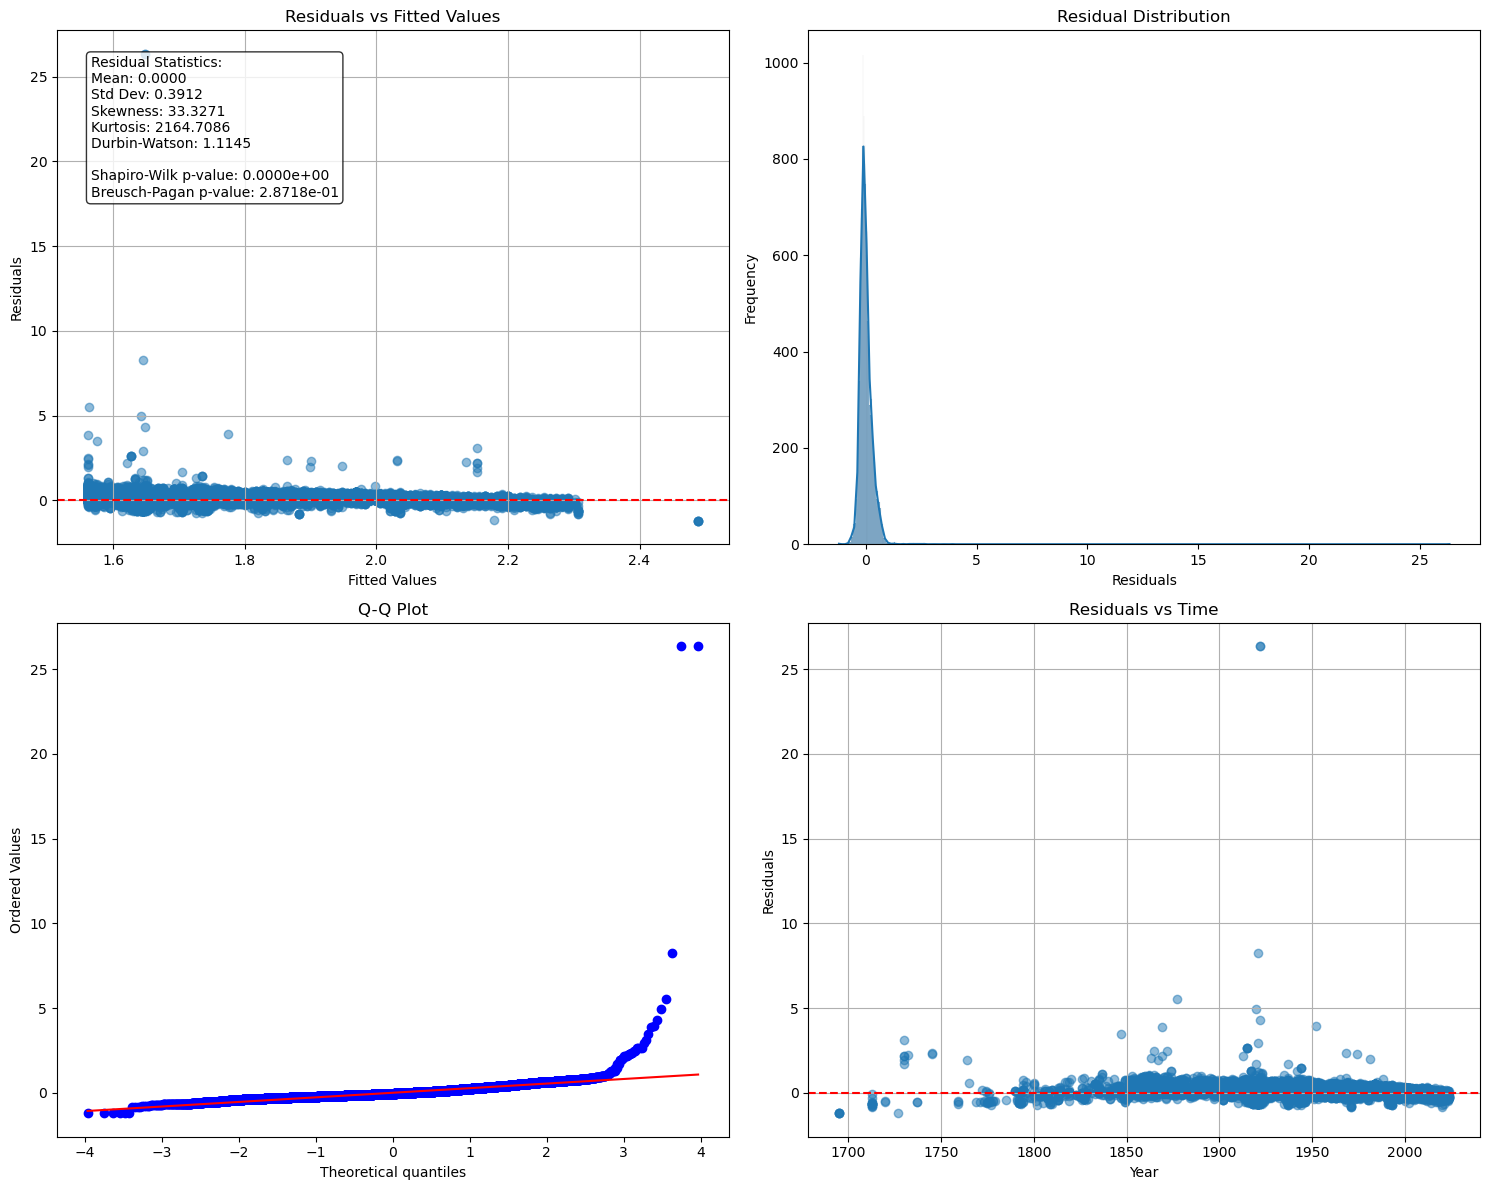


Detailed Residual Analysis:

1. Basic Statistics:
Mean: 0.0000
Std Dev: 0.3912
Skewness: 33.3271
Kurtosis: 2164.7086
Durbin-Watson: 1.1145

2. Normality Test (Shapiro-Wilk):
Statistic: 0.4800
P-value: 0.0000e+00
Interpretation: Residuals are not normal

3. Heteroscedasticity Test (Breusch-Pagan):
Statistic: 1.1328
P-value: 2.8718e-01
Interpretation: Variance is constant

4. Autocorrelation (Durbin-Watson):
Durbin-Watson statistic: 1.1145
Interpretation: Possible autocorrelation


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Load and prepare data
df = pd.read_csv('ratio_comparison_with_continent.csv')

# Clean and prepare data
def prepare_data(df):
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df = df.dropna(subset=['Year', 'Aspect Ratio'])
    return df.sort_values('Year')

df_cleaned = prepare_data(df)

# Fit polynomial regression
X = df_cleaned['Year'].values.reshape(-1, 1)
y = df_cleaned['Aspect Ratio'].values

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Get predictions and residuals
y_pred = model.predict(X_poly)
residuals = y - y_pred

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuals vs Fitted Values
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')
ax1.grid(True)

# 2. Residual Distribution
sns.histplot(residuals, kde=True, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Distribution')

# 3. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot')

# 4. Residuals vs Time
ax4.scatter(X, residuals, alpha=0.5)
ax4.axhline(y=0, color='r', linestyle='--')
ax4.set_xlabel('Year')
ax4.set_ylabel('Residuals')
ax4.set_title('Residuals vs Time')
ax4.grid(True)

# Calculate residual statistics
residual_stats = {
    'Mean': np.mean(residuals),
    'Std Dev': np.std(residuals),
    'Skewness': stats.skew(residuals),
    'Kurtosis': stats.kurtosis(residuals),
    'Durbin-Watson': durbin_watson(residuals)
}

# Add modified Breusch-Pagan test
# Add constant term to X_poly for BP test
X_bp = np.column_stack([np.ones_like(y_pred), y_pred])
bp_test = het_breuschpagan(residuals, X_bp)

# Add statistics textbox
stats_text = 'Residual Statistics:\n'
for key, value in residual_stats.items():
    stats_text += f'{key}: {value:.4f}\n'
stats_text += f'\nShapiro-Wilk p-value: {stats.shapiro(residuals)[1]:.4e}\n'
stats_text += f'Breusch-Pagan p-value: {bp_test[1]:.4e}'

# Add text box to the first subplot
ax1.text(0.05, 0.95, stats_text,
         transform=ax1.transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Residual Analysis:")
print("\n1. Basic Statistics:")
for key, value in residual_stats.items():
    print(f"{key}: {value:.4f}")

print("\n2. Normality Test (Shapiro-Wilk):")
sw_stat, sw_p = stats.shapiro(residuals)
print(f"Statistic: {sw_stat:.4f}")
print(f"P-value: {sw_p:.4e}")
print("Interpretation: Residuals are " + ("normal" if sw_p > 0.05 else "not normal"))

print("\n3. Heteroscedasticity Test (Breusch-Pagan):")
print(f"Statistic: {bp_test[0]:.4f}")
print(f"P-value: {bp_test[1]:.4e}")
print("Interpretation: Variance is " + ("constant" if bp_test[1] > 0.05 else "not constant"))

print("\n4. Autocorrelation (Durbin-Watson):")
dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.4f}")
print("Interpretation: " + ("No" if 1.5 < dw < 2.5 else "Possible") + " autocorrelation")